 <p style="font-family:verdana;color:#29285;font-size:200%;text-align:center"><b> 📊 CUSTOMER PERSONALITY ANALYSIS 📊 </b><p> 
 <p style="font-family:verdana;color:black;font-size:100%;text-align:center"><b> ➖By GROUP NO: 5</b><p> 
    

### 🏷 Probleme Statement

 Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
 
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



### 🏷 Attributes People


•	ID: Customer's unique identifier

•	Year_Birth: Customer's birth year

•	Education: Customer's education level

•	Marital_Status: Customer's marital status

•	Income: Customer's yearly household income

•	Kidhome: Number of children in customer's household

•	Teenhome: Number of teenagers in customer's household

•	Dt_Customer: Date of customer's enrollment with the company

•	Recency: Number of days since customer's last purchase

•	Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### 🏷 Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### 🏷 Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### 🏷 Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

### 🏷 Target

Need to perform clustering to summarize customer segments.

 <p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 1️⃣ IMPORTING LIBRARIES & DATASET </p> 

### 🏷 Load important Libraries

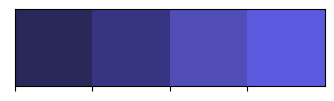

In [1]:
import pandas as pd # Python libraries for Data analysis and Dataframe
import numpy as np # Numerical Libraries for sloving linear
pd.set_option('display.max_columns', None) # code to display all columns 

#Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # This for manipulating data and time columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # This for handling categorical and scaling numerical columns

#Libraries for clustering and evaluation
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")

#set color palette
palette= sns.color_palette(["#292859",'#373482','#504DB6','#5B59DD'])
sns.palplot(palette) # print color palette

In [2]:
pwd

'C:\\Users\\Admin'

In [3]:
mc=pd.read_csv("marketing_campaign.csv", sep='\t')
mc

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [4]:
mc.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
# Now get a full informaion about this data
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#Check it what are the data types
mc.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
#Lets check ou how does dataset look mathematcally 
mc.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [8]:
# Check it any missing values are there in  given dataset
mc.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Observations:
Given dataset found it missing values present in `Income` columns

In [9]:
#Lets check out any duplicates value are present or not
mc.duplicated().sum()

0

### Observations :

1. Data contains 2240 rows and 29 columns
2. It has 1 float, 3 object and 25 int columns
3. Datetime columns have int datatype, need to fix that
4. Many categorical columns are alredy in int format, like AcceptedCmp1, Response
5. There are 24 missing values in Income column
6. There are no duplicate values within data

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 2️⃣ DATA CLEANING</p> 

In [10]:
# Next step is checking skewnesss
mc['Income'].skew()

6.763487372811116

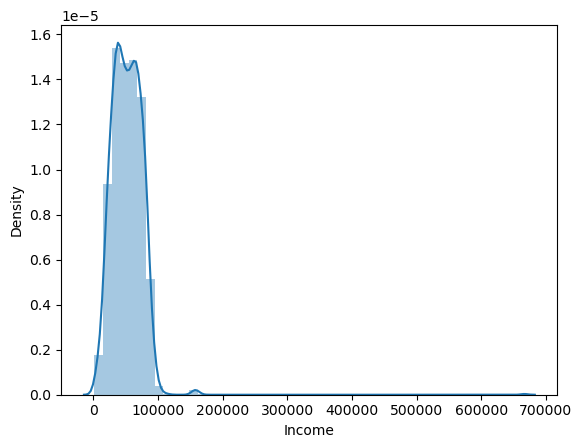

In [11]:
# Checking skewness by using graph
sns.distplot(mc['Income'])
plt.show()

Note:

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [12]:
# Now replacing the null values with median because data is skewed which means outliers present in this data
mc['Income'].fillna(mc['Income'].median(), inplace=True)

In [13]:
# lets check out any unique values are present
mc['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [14]:
# Also check out any unique values  are present
mc['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

* In the next step, I am going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

* Thus to get the values I must check the newest and oldest recorded dates.

In [15]:
mc["Dt_Customer"]= pd.to_datetime(mc["Dt_Customer"])
dates= []
for i in mc['Dt_Customer']:
    i = i.date()
    dates.append(i)

#Dates of newest and oldest recorded customer
print("The newest cutomer's enrollment date the records:", max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest cutomer's enrollment date the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


* Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [16]:
# Created feaure Customer_for
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
mc["Customer_For"] = days
mc["Customer_For"] = pd.to_numeric(mc["Customer_For"], errors='coerce')

In [17]:
mc["Customer_For"]

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_For, Length: 2240, dtype: int64

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 3️⃣  FEATURE ENGINEERING</p> 

### **Steps to follow:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [18]:
# Age of Customer today
mc["Age"] = 2021-mc["Year_Birth"]

#Total spendings on various items
mc["Spent"] = mc["MntWines"]+ mc["MntFruits"]+ mc["MntMeatProducts"]+ mc["MntFishProducts"]+ mc["MntSweetProducts"]+ mc["MntGoldProds"]

#Deriving living situation by marital status"Alone"
mc["Living_With"]=mc["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
mc["Children"]=mc["Kidhome"]+mc["Teenhome"]

#Feature for total members in the householde
mc["Family_Size"] = mc["Living_With"].replace({"Alone": 1, "Partner":2})+mc["Children"]

#Feature pertaining parenthood
mc["Is_Parent"] = np.where(mc.Children> 0, 1, 0)

#Segmenting education levels in three groups
mc["Education"]=mc["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
mc=mc.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
mc = mc.drop(to_drop, axis=1)

* Now that we have some new features let's have a look at the data's stats. 

In [19]:
mc.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52237.975446     0.444196     0.506250    49.109375   303.935714   
std     25037.955891     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean     26.302232   166.950000    37.525446    27.062946    44.021875   
std      39.773434   225.715373    54.628979    41.280498    52.167439   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000    16.000000     3.000000     1.000000     9.000000   
50%       8.000000    67.000000    12.000000     8.000000    24.000000   
75%      33.000000   232.000000    50.000000    33.000000    56.000000   
max     199.000000  1725.000000   259.000000   263.000000   362.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
std             1.932238         2.778714             2.923101   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2240.000000        2240.000000   2240.000000   2240.000000   
mean            5.790179           5.316518      0.072768      0.074554   
std             3.250958           2.426645      0.259813      0.262728   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2240.000000   2240.000000   2240.000000  2240.000000  2240.000000   
mean       0.072768      0.064286      0.013393     0.009375     0.149107   
std        0.259813      0.245316      0.114976     0.096391     0.356274   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

       Customer_For          Age        Spent     Children  Family_Size  \
count  2.240000e+03  2240.000000  2240.000000  2240.000000  2240.000000   
mean   4.424054e+16    52.194196   605.798214     0.950446     2.595089   
std    2.006466e+16    11.984069   602.249288     0.751803     0.906959   
min    0.000000e+00    25.000000     5.000000     0.000000     1.000000   
25%    2.944080e+16    44.000000    68.750000     0.000000     2.000000   
50%    4.432320e+16    51.000000   396.000000     1.000000     3.000000   
75%    5.920560e+16    62.000000  1045.500000     1.000000     3.000000   
max    9.184320e+16   128.000000  2525.000000     3.000000     5.000000   

         Is_Parent  


### Observations:
The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that  max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.

I must take a look at the broader view of the data. 
I will plot some of the selected features.

In [20]:
from matplotlib import colors

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

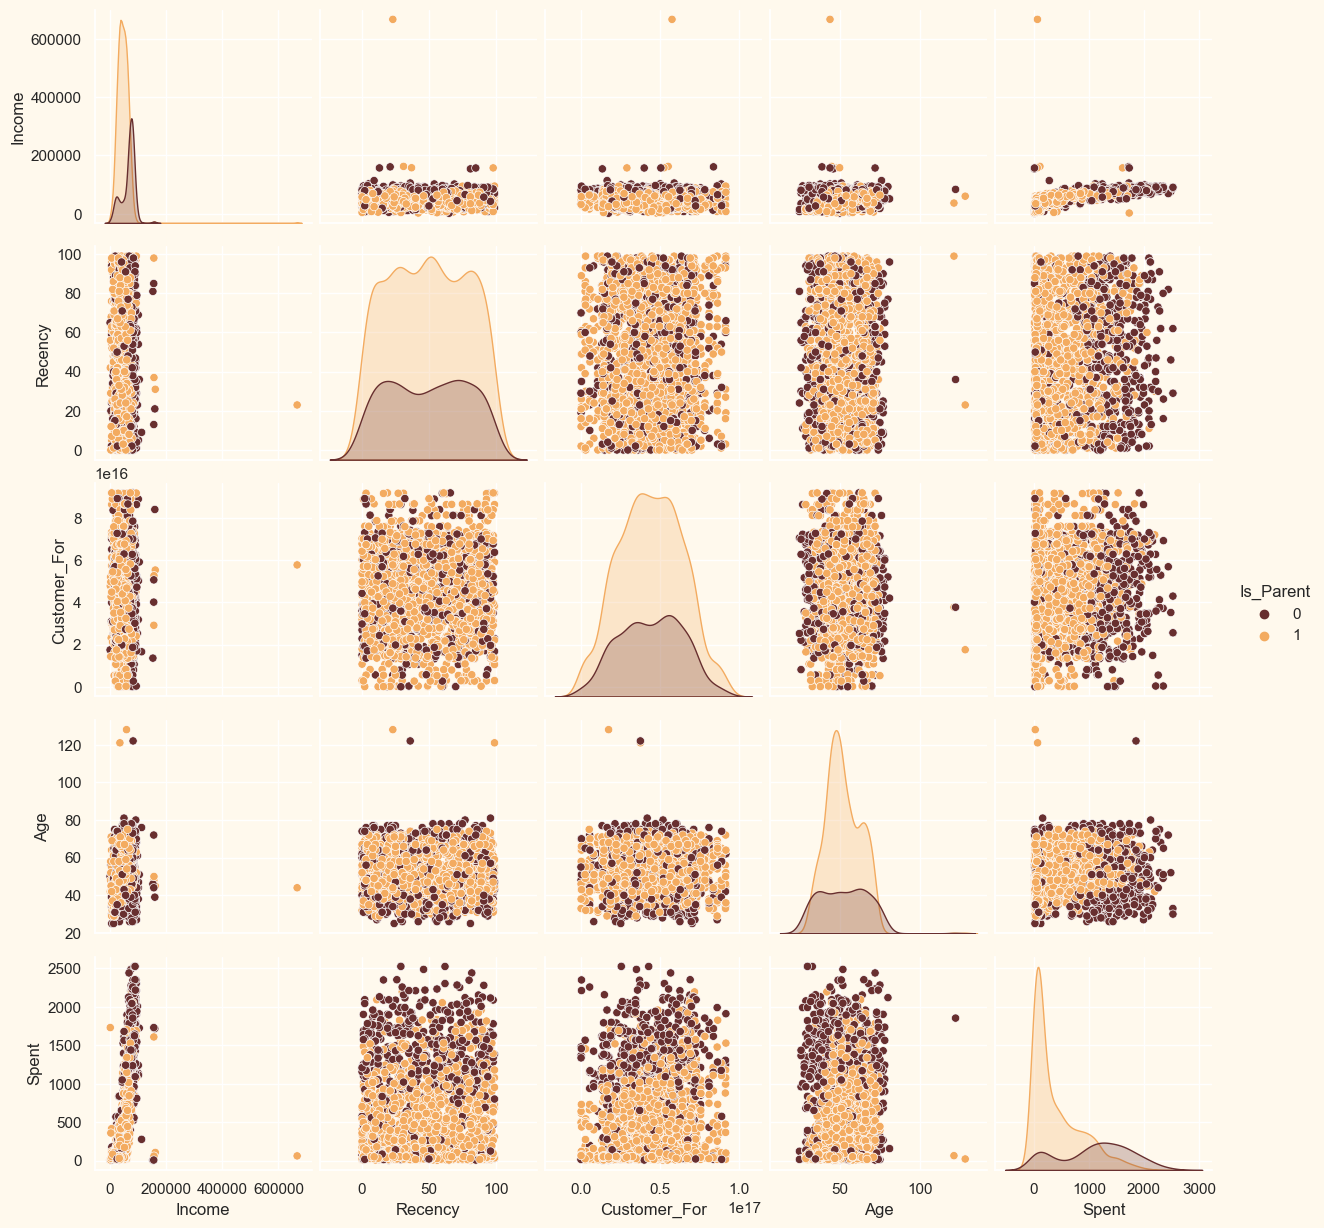

In [21]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(mc[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

### Observations:
Clearly, there are a few outliers in the Income and Age features. 
I will be deleting the outliers in the data. 

In [22]:
# Droping the outliers by setting a cap on age and income
mc = mc[(mc["Age"]<90)]
mc = mc[(mc["Income"]<600000)]
print("The total number of data_points after removing the outliers are:", len(mc))

The total number of data_points after removing the outliers are: 2236


* Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)

<AxesSubplot:>

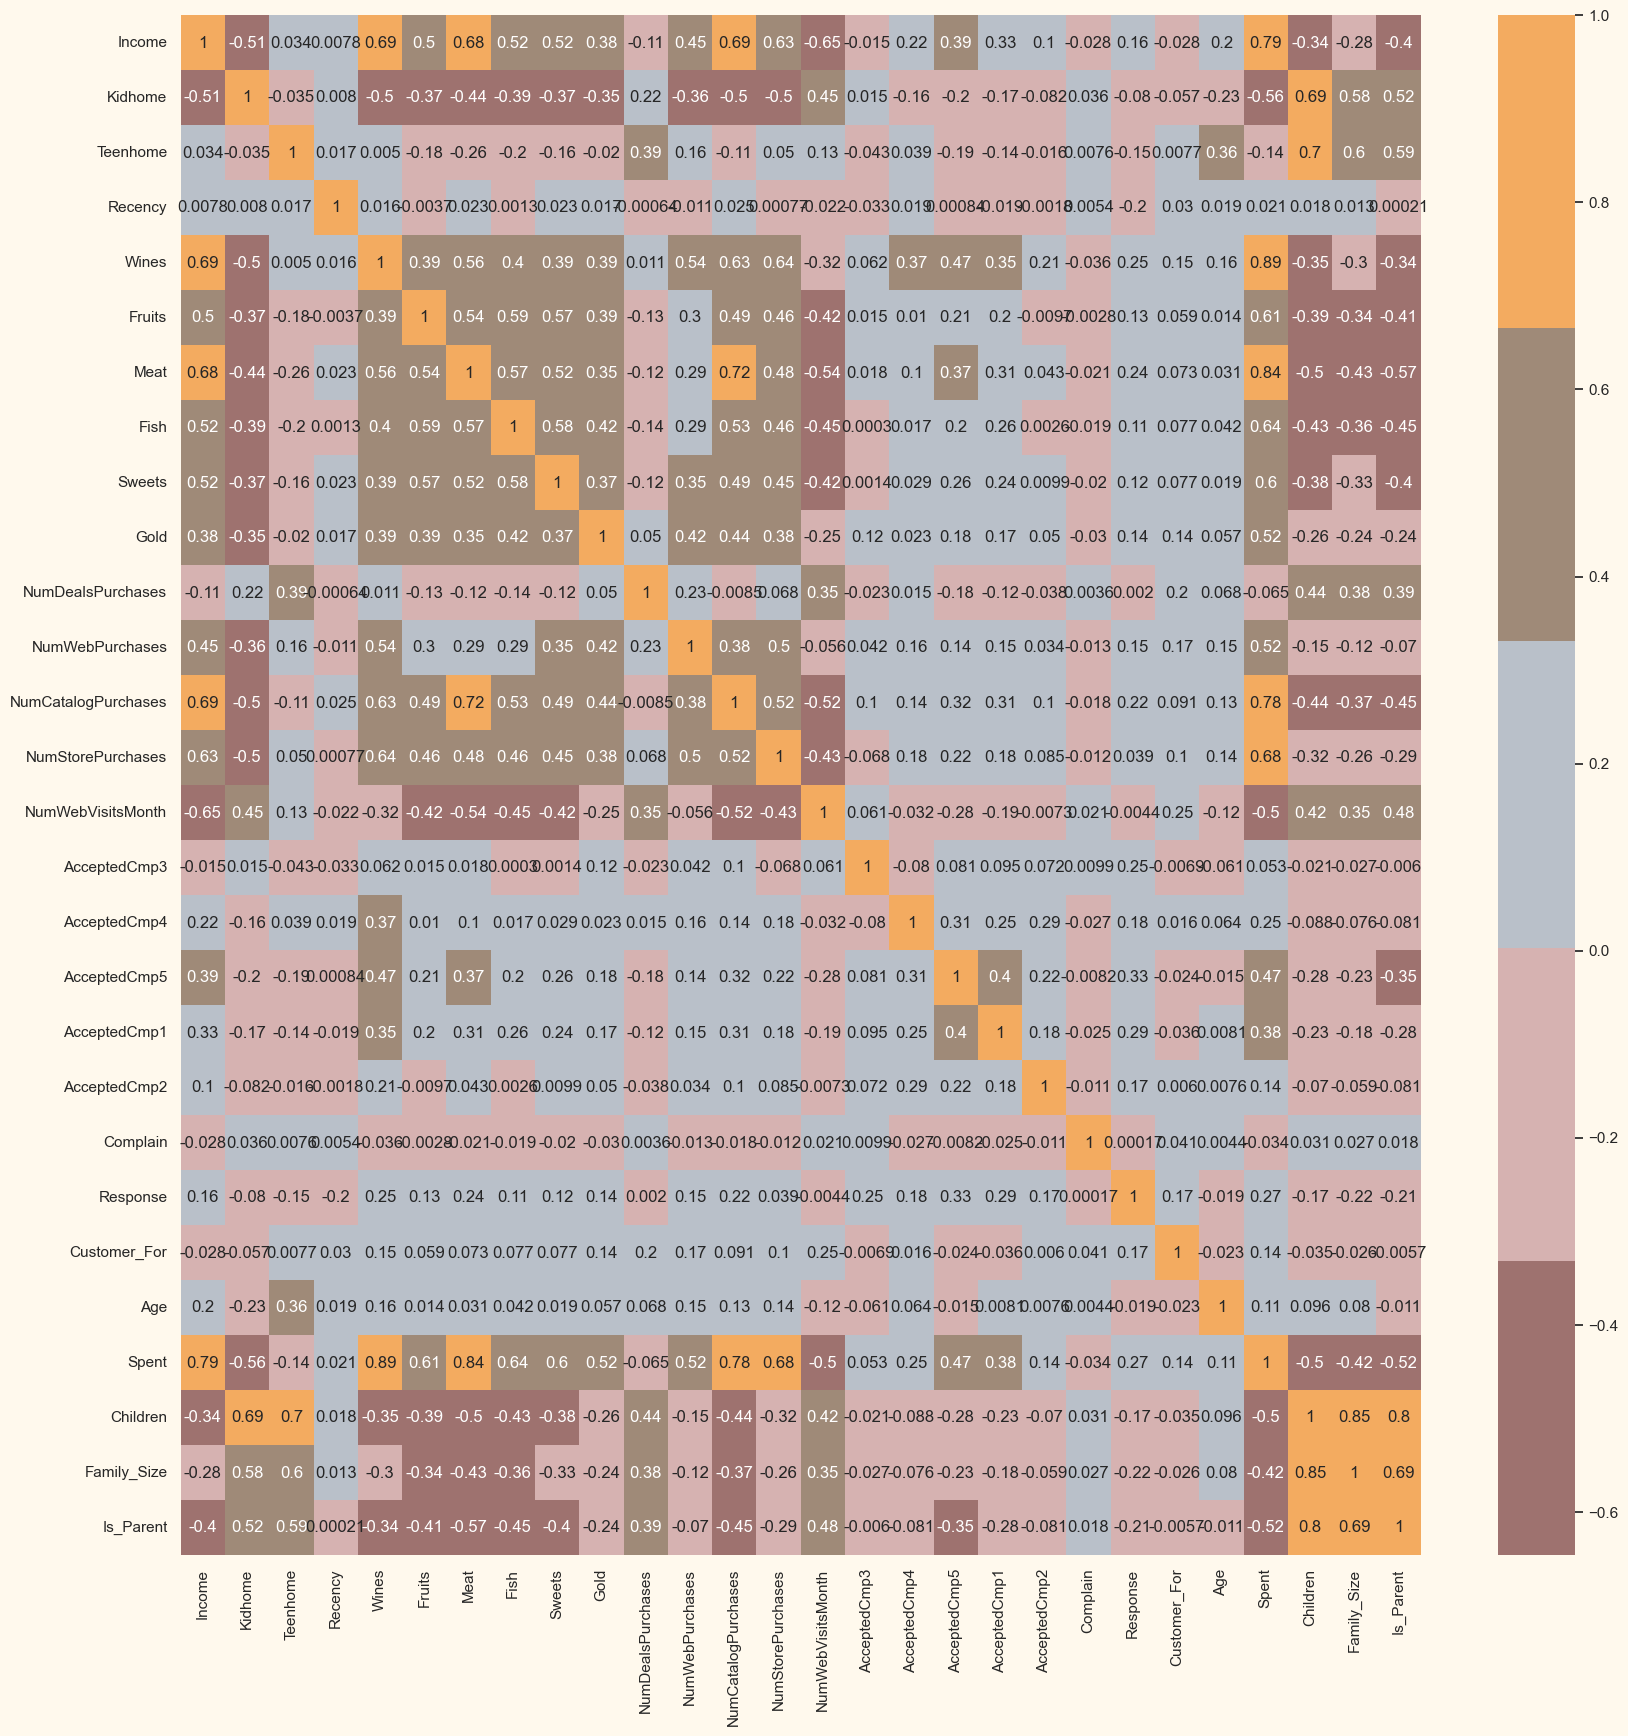

In [23]:
# Ploting heatmap to see correlation
# correlation matrix
corrmat = mc.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

#### Observations:
The data is quite clean and the new features have been included.

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 4️⃣ DATA PREPROCESSING</p> 

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features

* Scaling the features using the standard scaler

* Creating a subset dataframe for dimensionality reduction

In [24]:
# Get list of categorical variables
s = (mc.dtypes == 'object')
object_cols= list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
# Label Encoding the Object dtypes
LE=LabelEncoder()
for i in object_cols:
    mc[i]=mc[[i]].apply(LE.fit_transform)
    
print("All features are numerical")

All features are numerical


In [27]:
# Creating a copy of data
mc1 = mc.copy()
# Creating a subset of dataframe by droping the features on deals accepteed and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
mc1 = mc1.drop(cols_del, axis=1)


In [28]:
mc1

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0      172      88    88                  3                8   
1        2       1     6                  2                1   
2      111      21    42                  1                8   
3       10       3     5                  2                2   
4       46      27    15                  5                5   
...    ...     ...   ...                ...              ...   
2235    42     118   247                  2                9   
2236     0       0     8                  7                8   
2237    32      12    24                  1                2   
2238    80      30    61                  2                6   
2239     2       1    21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                      10                  4                  7   
1                       1                  2                  5   
2                       2                 10                  4   
3                       0                  4                  6   
4                       3                  6                  5   
...                   ...                ...                ...   
2235                    3                  4                  5   
2236                    2                  5                  7   
2237                    3                 13                  6   
2238                    5                 10                  3   
2239                    1                  4                  7   

           Customer_For  Age  Spent  Living_With  Children  Family_Size  \
0     83894400000000000   64   1617            0         0            1   
1     10800000000000000   67     27            0         2            3   
2     40780800000000000   56    776            1         0            2   
3      5616000000000000   37     53            1         1            3   
4     27734400000000000   40    422            1         1            3   
...                 ...  ...    ...          ...       ...          ...   
2235  46742400000000000   54   1341            1         1            3   
2236   5270400000000000   75    444            1         3            5   
2237  27216000000000000   40   1241            0         0            1   
2238  27302400000000000   65    843            1         1            3   
2239  67564800000000000   67    172            1         2            4   

      Is_Parent  
0             0  
1             1  
2             0  
3             1  
4             1  
...         ...  
2235          1  
2236          1  
2237          0  
2238          1  
2239          1  

[2236 rows x 23 columns]

In [29]:
# Now scaling a dataset by standard scaler()
scaler = StandardScaler()
scaler.fit(mc1)
scaled_mc1 = pd.DataFrame(scaler.transform(mc1),columns = mc1.columns)
print("All features are now scaled")

All features are now scaled


In [30]:
#Scaled data to be used for reducing the dimensionality
print("DataFrame to be used for further modelling:")
scaled_mc1.head()

DataFrame to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0   -0.89438  0.288947 -0.824939 -0.930615  0.306856  0.983228  1.554170   
1   -0.89438 -0.262003  1.032627  0.905974 -0.383971 -0.871064 -0.636431   
2   -0.89438  0.918423 -0.824939 -0.930615 -0.798467  0.362159  0.572177   
3   -0.89438 -1.182183  1.032627 -0.930615 -0.798467 -0.871064 -0.560893   
4    0.57070  0.296187  1.032627 -0.930615  1.550344 -0.389661  0.421101   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.679746  2.461068  1.475396  0.845669           0.348738         1.407639   
1 -0.713455 -0.650414 -0.631638 -0.729742          -0.168700        -1.110921   
2 -0.177201  1.344595 -0.147262 -0.038098          -0.686137         1.407639   
3 -0.651409 -0.503991 -0.583200 -0.748954          -0.168700        -0.751127   
4 -0.217088  0.154911 -0.001950 -0.556831           1.383614         0.328256   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.509801          -0.552429           0.692865      1.975467   
1            -0.568970          -1.167738          -0.131421     -1.667017   
2            -0.226884           1.293496          -0.543564     -0.172996   
3            -0.911056          -0.552429           0.280722     -1.925349   
4             0.115201           0.062879          -0.131421     -0.823131   

        Age     Spent  Living_With  Children  Family_Size  Is_Parent  
0  1.016868  1.680176    -1.347635 -1.264308    -1.758810  -1.584362  
1  1.273264 -0.962202    -1.347635  1.395139     0.445618   0.631169  
2  0.333146  0.282541     0.742041 -1.264308    -0.656596  -1.584362  
3 -1.290693 -0.918994     0.742041  0.065416     0.445618   0.631169  
4 -1.034298 -0.305762     0.742041  0.065416     0.445618   0.631169

In [31]:
mc1.shape

(2236, 23)

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 5️⃣ DIMENSIONALITY REDUCTION</p> 


In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

In [32]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [33]:
# Initiating PCA to reduce dimensions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_mc1)
PCA_mc1 = pd.DataFrame(pca.transform(scaled_mc1), columns=(["col1","col2", "col3"]))
PCA_mc1.describe()

col1          col2          col3
count  2.236000e+03  2.236000e+03  2.236000e+03
mean  -5.620628e-17  2.023823e-16  6.305828e-18
std    2.872964e+00  1.706404e+00  1.219616e+00
min   -5.964494e+00 -4.317971e+00 -3.486481e+00
25%   -2.530497e+00 -1.331854e+00 -8.273149e-01
50%   -7.821557e-01 -1.594170e-01 -3.149375e-02
75%    2.376531e+00  1.239341e+00  7.972179e-01
max    7.449425e+00  6.114172e+00  6.554822e+00

In [34]:
PCA_mc1

col1      col2      col3
0     4.991747 -0.136301  2.633621
1    -2.873077 -0.004270 -1.889693
2     2.624542 -0.724163 -0.247511
3    -2.663228 -1.541934 -0.868346
4    -0.639753  0.206836  0.007408
...        ...       ...       ...
2231  2.310577  2.433290  0.586950
2232 -3.103308  4.003963 -1.508124
2233  2.688764 -1.857995  0.532250
2234  1.496446  1.696011 -1.630963
2235 -2.735065  1.640449 -0.284041

[2236 rows x 3 columns]

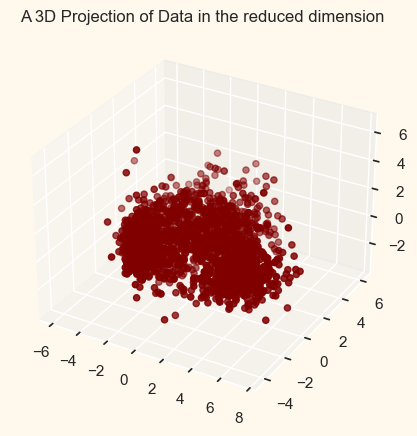

In [35]:
# 3D Projection od Data in the reduce dimension
x =PCA_mc1["col1"]
y =PCA_mc1["col2"]
z =PCA_mc1["col3"]
# Tp plot 3D
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o")
ax.set_title("A 3D Projection of Data in the reduced dimension")
plt.show()

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 6️⃣ CLUSTERING</p> 

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [36]:
#pip install -U yellowbrick

In [37]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

Elbow Method to determine the number of clusters to be formed:


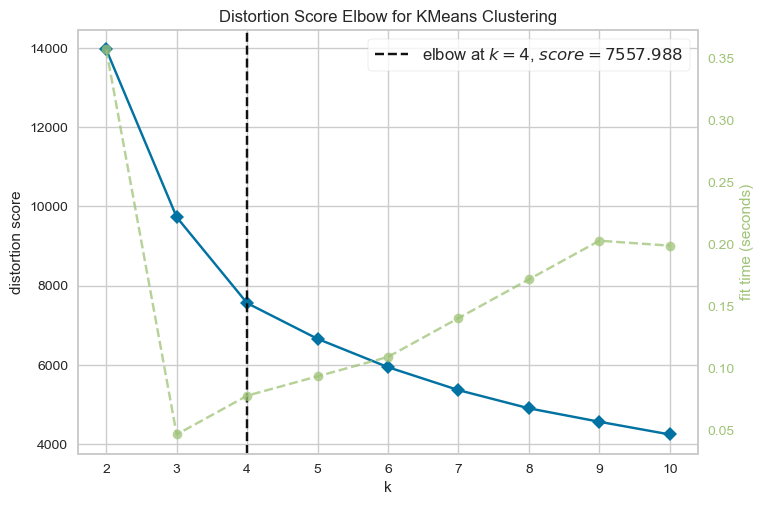

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Now examination od elbow method to find numbers of clusters to make
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=(2, 11))
Elbow_M.fit(PCA_mc1)
Elbow_M.show()

### Observations:
The above cell indicates that four will be an optimal number of clusters for this data. 


### Silhouette score for KMeans Clustering

In [39]:
#Lets check out Silhouettescore for Kmeans
no_of_clusters=range(2,11)
Kscore=[]
for i in no_of_clusters:
    Kmeans_model=KMeans(n_clusters=i, random_state=20)
    pred = Kmeans_model.fit_predict(PCA_mc1)
    Kscore.append(silhouette_score(PCA_mc1, pred))
Kscore 

[0.44592118226278926,
 0.411526870695853,
 0.37629210678030833,
 0.3498742354240568,
 0.354725003215229,
 0.36011325616671985,
 0.3125220017159465,
 0.31730928714061263,
 0.31840686579071076]

### Silhouette score for Hierarchical Clustering

In [40]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [41]:
#  fitting the Agglomerative Clustering Model to get the final clusters.
AC = AgglomerativeClustering(n_clusters=4)
# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_mc1)
PCA_mc1["Clusters"] = yhat_AC
#Adding the clusters feaures to the original dataframe.
mc["Clusters"] = yhat_AC

In [42]:
#Lets check out Silhouettescore for Hierarchical
no_of_clusters = range(2,11)
wcss = []
for i in no_of_clusters:
    HC_model = AgglomerativeClustering(n_clusters=i, affinity= "euclidean", linkage = "ward")
    HC_model.fit(PCA_mc1)
    wcss.append(silhouette_score(PCA_mc1, HC_model.fit_predict(PCA_mc1)))
wcss

[0.4400553959636521,
 0.4225337845546109,
 0.3793705307841691,
 0.3729882905410365,
 0.3742205570802708,
 0.38570093891690005,
 0.38796410789356733,
 0.35686157639838445,
 0.3004763324529728]

### To examine the clusters formed let's have a look at the 3-D distribution of the clusters. 

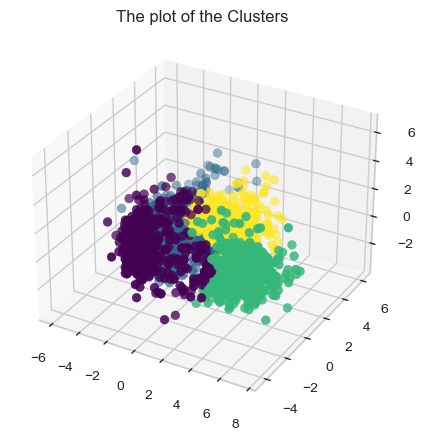

In [44]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111, projection='3d', label= "bla")
ax.scatter(x,y,z, s=40, c=PCA_mc1["Clusters"], marker ="o", cmap="viridis")
ax.set_title("The plot of the Clusters")
plt.show()

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 7️⃣ EVALUATING MODELS</p> 

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns. 

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions. 

**Firstly, let us have a look at the group distribution of clustring**

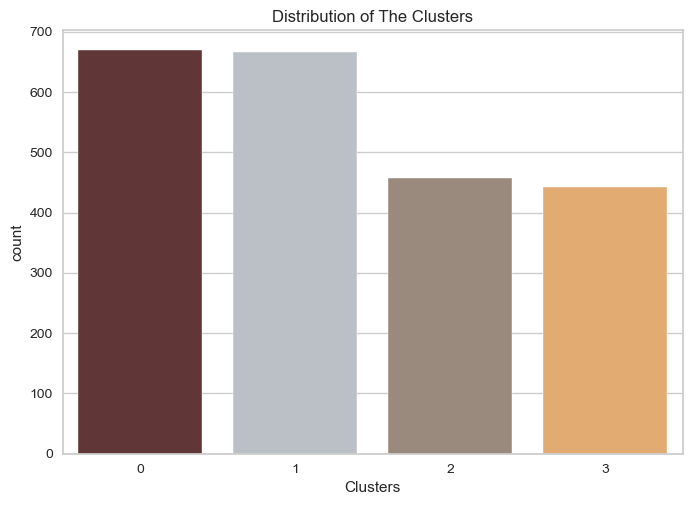

In [45]:
#Now plotTing countplot of clusters
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=mc["Clusters"], palette= pal)
pl.set_title("Distribution of The Clusters")
plt.show()

### Observations:
The clusters seem to be fairly distributed.

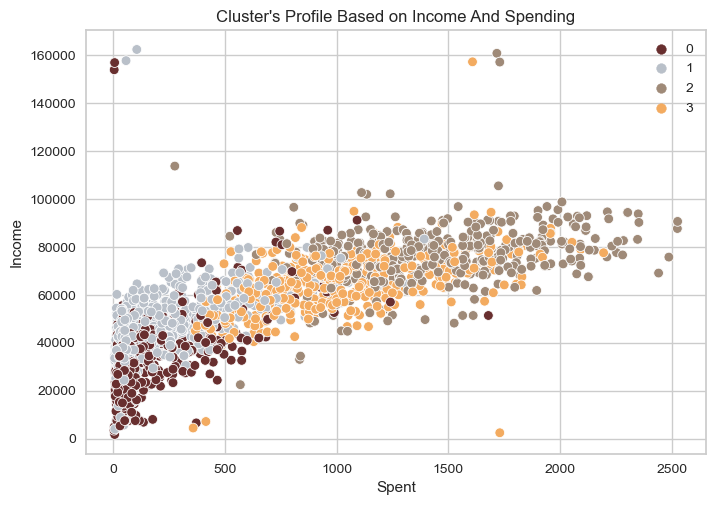

In [46]:
pl = sns.scatterplot(data=mc, x=mc["Spent"], y=mc["Income"], hue= mc["Clusters"], palette =pal)
pl.set_title("Cluster's Profile Based on Income And Spending")
plt.legend()
plt.show()

### Observations:
**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: high spending & low income  



####  Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

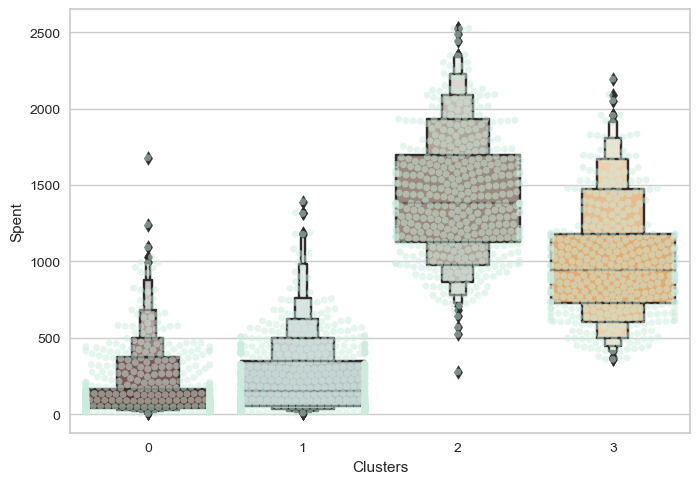

In [47]:
plt.figure()
pl=sns.swarmplot(x=mc["Clusters"], y=mc["Spent"], color="#CBEDDD", alpha=0.5)
pl=sns.boxenplot(x=mc["Clusters"], y=mc["Spent"], palette=pal)
plt.show()

### Observations:
From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

#### Let us next explore how did our campaigns do in the past.

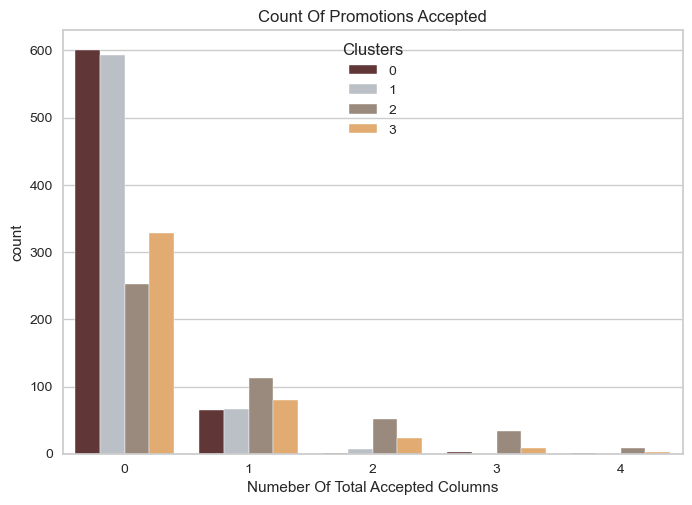

In [48]:
# creating a features to get sum of acceped promotions
mc["Total_Promos"]= mc["AcceptedCmp1"]+ mc["AcceptedCmp2"]+ mc["AcceptedCmp3"]+ mc["AcceptedCmp4"]+ mc["AcceptedCmp5"]
# Plotting count of total campaign accepted.
plt.figure()
pl= sns.countplot(x=mc["Total_Promos"], hue=mc["Clusters"], palette = pal)
pl.set_title("Count Of Promotions Accepted")
pl.set_xlabel("Numeber Of Total Accepted Columns")
plt.show()

### Observations:
There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

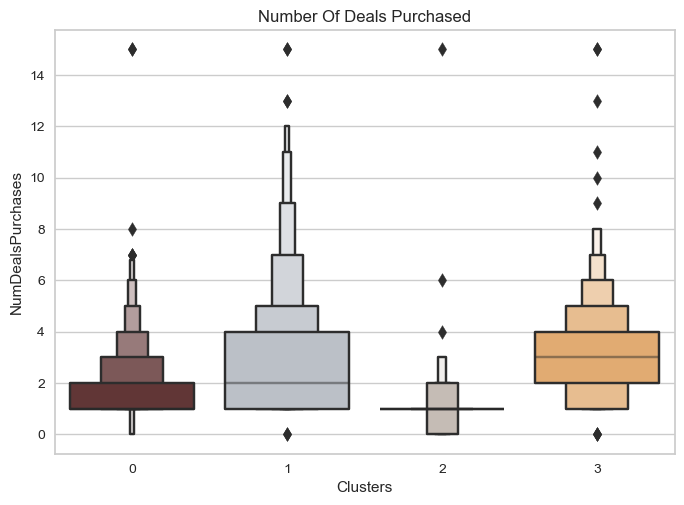

In [49]:
# Now plotting the Number of deals purchased
plt.figure()
pl=sns.boxenplot(y=mc["NumDealsPurchases"], x=mc["Clusters"], palette=pal)
pl.set_title("Number Of Deals Purchased")
plt.show()

### Observations:
Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. 
However, our star customers cluster 1 are not much into the deals. 
Nothing seems to attract cluster 2 overwhelmingly 


<Figure size 800x550 with 0 Axes>

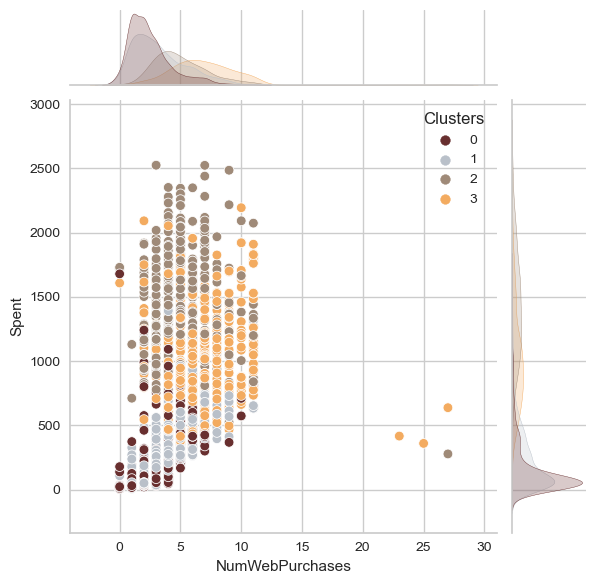

<Figure size 800x550 with 0 Axes>

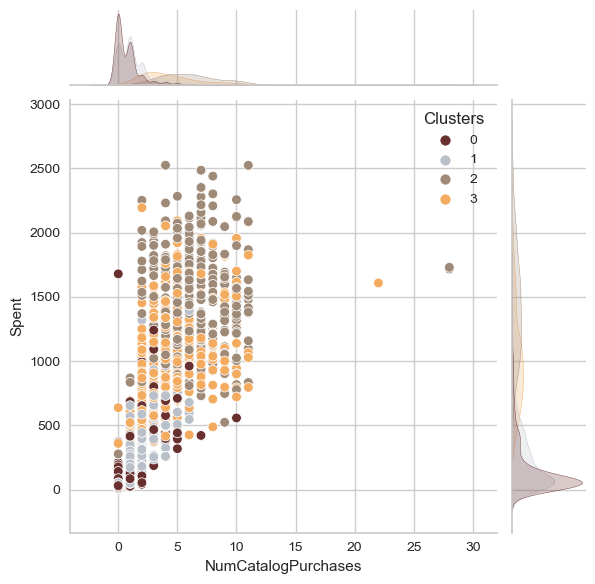

<Figure size 800x550 with 0 Axes>

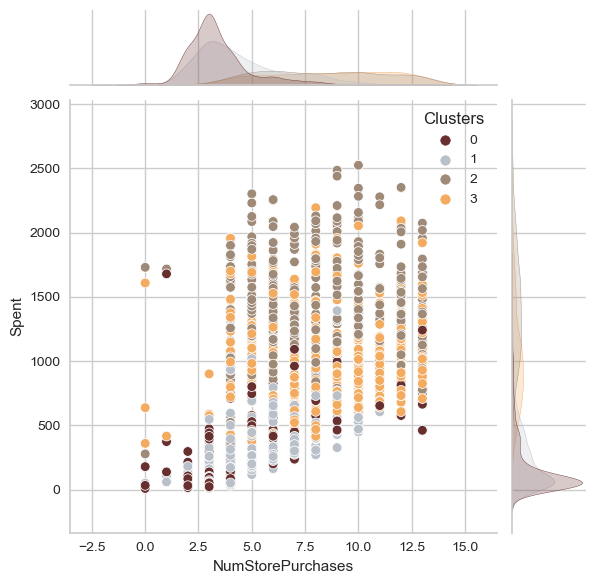

<Figure size 800x550 with 0 Axes>

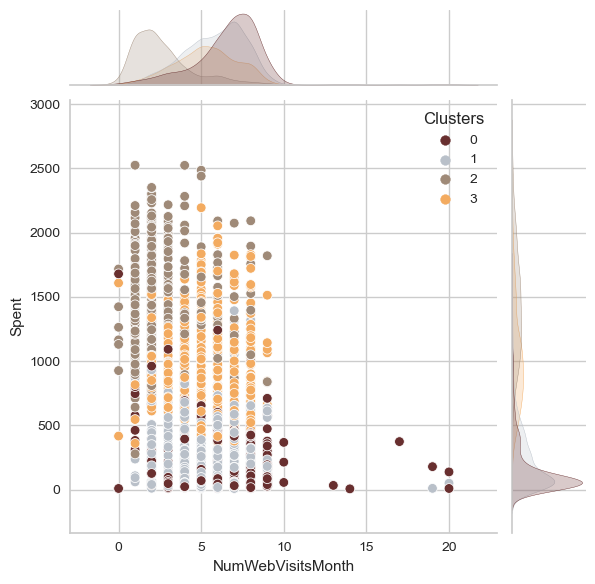

In [50]:
# Now check more details on the purchasing style
Places=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 
for i in Places:
    plt.figure()
    sns.jointplot(x=mc[i], y=mc["Spent"], hue=mc["Clusters"], palette=pal)
    plt.show()

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> 8️⃣ CLUSTER PROFILING</p> 

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

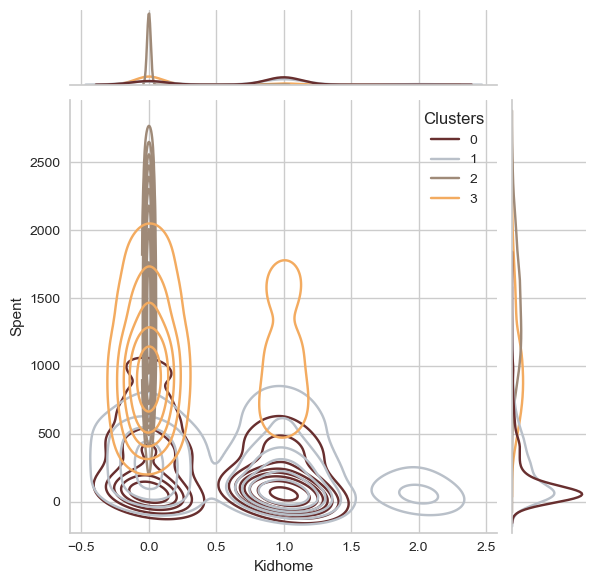

<Figure size 800x550 with 0 Axes>

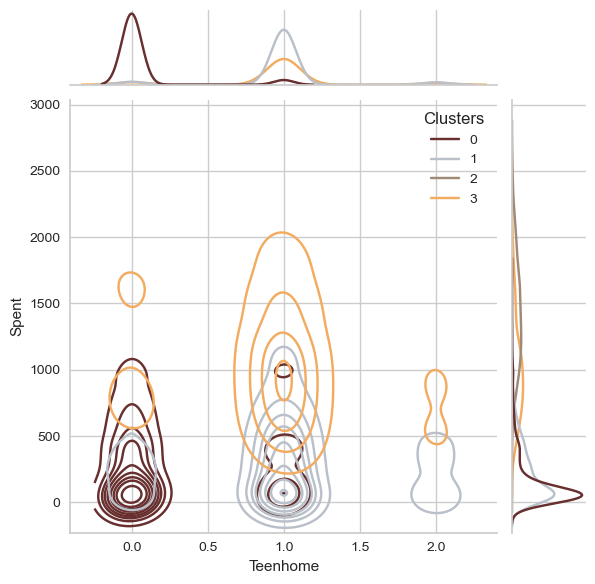

<Figure size 800x550 with 0 Axes>

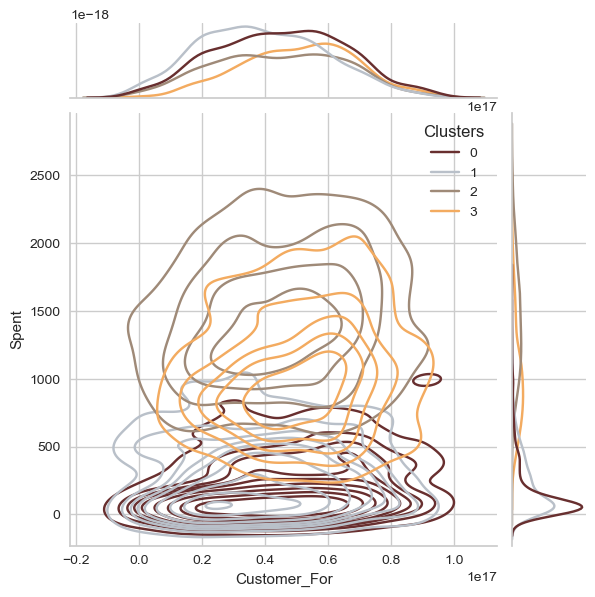

<Figure size 800x550 with 0 Axes>

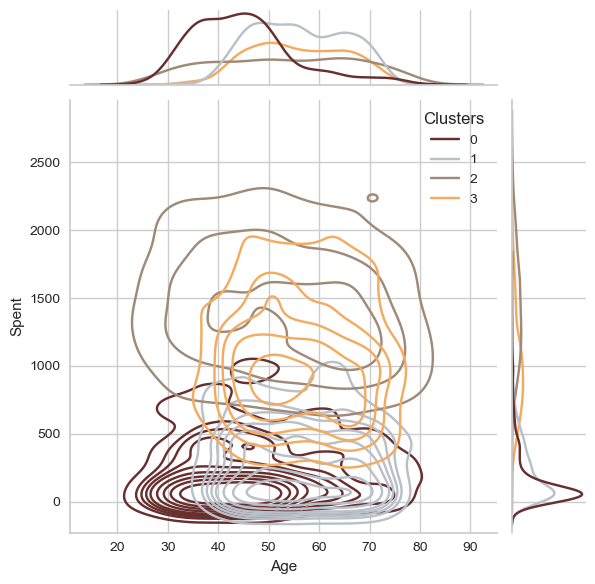

<Figure size 800x550 with 0 Axes>

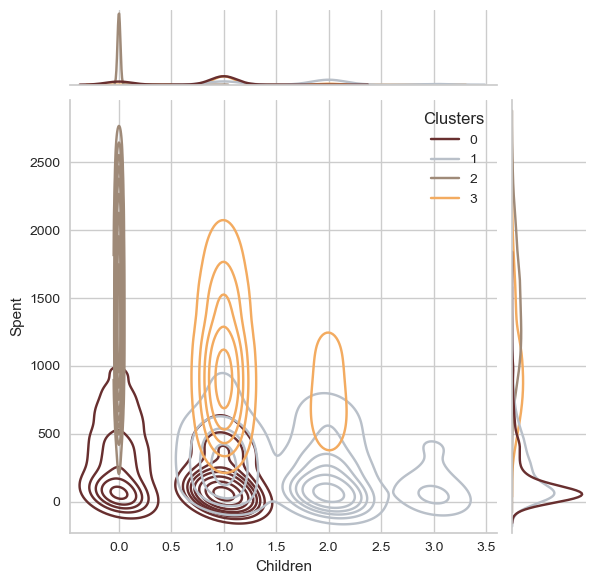

<Figure size 800x550 with 0 Axes>

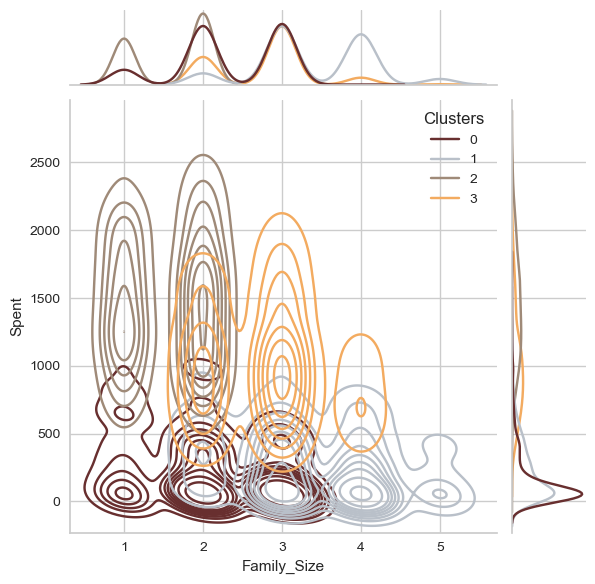

<Figure size 800x550 with 0 Axes>

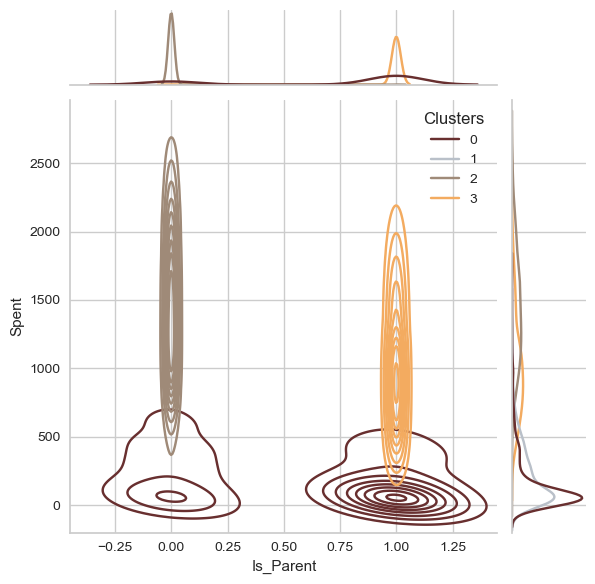

<Figure size 800x550 with 0 Axes>

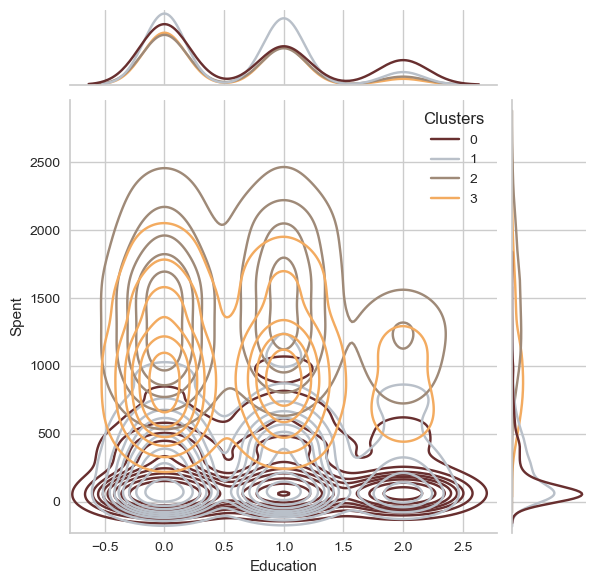

<Figure size 800x550 with 0 Axes>

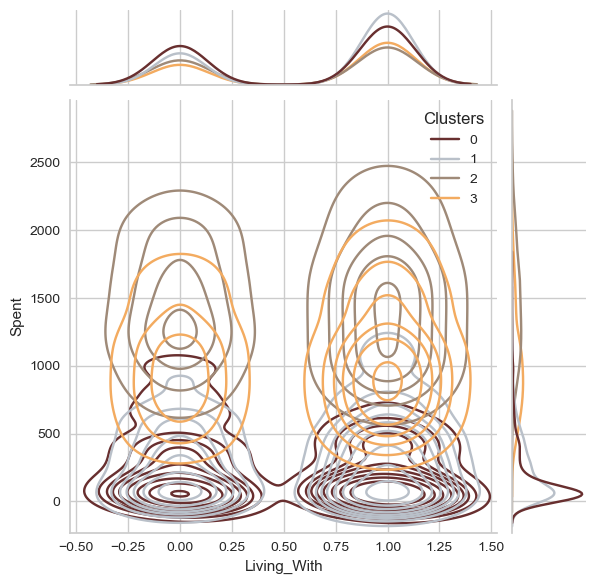

In [51]:
Personal = ["Kidhome","Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=mc[i], y=mc["Spent"], hue=mc["Clusters"], kind="kde", palette=pal)
    plt.show()

### Observations:



#### About the Cluster 0:
* Are a definately a parent.
* At the max have 4 members in the family and atleast2.
* Single parent are a subset of this group.
* Most have a teenager at home
* Relatively older.

#### About the Cluster 1:
* Are a definately not a parent.
* At the max are only 2 members in the family.
* A slight majority  of couples over single people.
* Span all ages.
* A high Income group.

#### About the Cluster 2:
* The majority od these people are parents.
* At the max are 3 members in the family.
* They majority have one kid(and not teenagers typically).
* Relatively younger.

#### About the Cluster 3:
* They are definately a parent.
* At the max are 5 members in the family and atleast 2.
* Majority of them have a teenager at home.
* Ralatively older.
* A lower- income group.

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">9️⃣ MODEL BUILDING</p> 

### Now lets build a multi classification model that will predict the cluster for given input of perticular customer
### **Steps To Follow:**
* Import required libraries
* Separate features and target column (Clusters)
* Create train and test data by spliting


In [52]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [53]:
# Selecting the some columns to use for model building
subset=mc[['Education','Income', 'Kidhome', 'Teenhome','Recency','NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent','Clusters', 'Complain', 'Response']]

In [54]:
subset

Education   Income  Kidhome  Teenhome  Recency  NumDealsPurchases  \
0             0  58138.0        0         0       58                  3   
1             0  46344.0        1         1       38                  2   
2             0  71613.0        0         0       26                  1   
3             0  26646.0        1         0       26                  2   
4             1  58293.0        1         0       94                  5   
...         ...      ...      ...       ...      ...                ...   
2235          0  61223.0        0         1       46                  2   
2236          1  64014.0        2         1       56                  7   
2237          0  56981.0        0         0       91                  1   
2238          1  69245.0        0         1        8                  2   
2239          1  52869.0        1         1       40                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  Age  Spent  Living_With  Children  Family_Size  \
0                     7   64   1617            0         0            1   
1                     5   67     27            0         2            3   
2                     4   56    776            1         0            2   
3                     6   37     53            1         1            3   
4                     5   40    422            1         1            3   
...                 ...  ...    ...          ...       ...          ...   
2235                  5   54   1341            1         1            3   
2236                  7   75    444            1         3            5   
2237                  6   40   1241            0         0            1   
2238                  3   65    843            1         1            3   
2239                  7   67    172            1         2            4   

      Is_Parent  Clusters  Complain  Response  
0             0         2         0         1  
1             1         1         0         0  
2             0         2         0         0  
3             1         0         0         0  
4             1         1         0         0  
...         ...       ...       ...       ...  
2235          1         3         0         0  
2236          1         1         0         0  
2237          0         0         0         0  
2238          1         3         0         0  
2239          1         1         0         1  

[2236 rows x 19 columns]

In [55]:
subset.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent', 'Clusters', 'Complain',
       'Response'],
      dtype='object')

In [56]:
# Now assign x and y variables.
x = subset.drop('Clusters', axis=1)
y = subset["Clusters"]

In [57]:
# Creating a train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [58]:
# Now create a model
logistic_r = LogisticRegression(solver='lbfgs')

In [59]:
# fit the data to new pipeline & model
logistic_r.fit(x_train, y_train)

LogisticRegression()

In [60]:
# Now check accuracy our model
logistic_r.score(x_test, y_test)

0.5842026825633383

In [61]:
y_pred=logistic_r.predict(x_test)
y_pred

array([0, 0, 2, 2, 3, 1, 1, 2, 2, 0, 1, 0, 3, 3, 0, 0, 0, 1, 2, 0, 0, 2,
       3, 0, 2, 1, 0, 1, 2, 0, 2, 3, 0, 3, 0, 1, 2, 1, 2, 2, 1, 2, 3, 0,
       3, 3, 2, 1, 0, 3, 1, 1, 2, 3, 0, 3, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 3, 2, 0, 3, 2, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3,
       0, 2, 2, 2, 1, 0, 3, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2,
       1, 3, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 0,
       2, 0, 1, 1, 0, 2, 3, 3, 1, 1, 1, 3, 2, 0, 3, 1, 1, 1, 0, 2, 1, 3,
       1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 3, 1, 0, 3, 2, 2, 1, 1, 2, 2, 0,
       2, 3, 1, 1, 2, 3, 0, 3, 1, 0, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 0,
       3, 1, 1, 2, 0, 1, 0, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3, 2, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1, 3,
       2, 3, 3, 3, 3, 0, 1, 0, 1, 1, 1, 1, 0, 3, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 0, 3, 2, 1, 0, 2, 0,
       2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 3,

In [62]:
confusion_matrix(y_test,y_pred)

array([[ 99,  94,   1,  13],
       [ 63, 126,   6,  10],
       [  0,   3, 109,  30],
       [  4,  17,  38,  58]], dtype=int64)

<p style="background-color:black;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">  🔟 MODEL DEPLOYMENT</p> 

* To deploy any file, it should be in .py format
* Make a .py file and Put code for front and backhand inside .py file
* %%writefile command will convert all the code within this cell into .py file

In [63]:
from pickle import load
from pickle import dump

In [71]:
scaler= load(open('scaler.sav', 'rb'))

loaded_model = load(open('kmeans.sav', 'rb'))


In [68]:
%%writefile Customer_Personality_Analysis_app.py 


import pandas as pd
import numpy as np
import streamlit as st 
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


logistic_r = LogisticRegression(solver='lbfgs')
scaler= load(open('scaler.sav', 'rb'))

loaded_model = load(open('kmeans.sav', 'rb'))


# creating a function for Prediction

def db_prediction(input_data):
    

    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    
    input_data_reshaped=scaler.transform(input_data_reshaped)
    prediction = loaded_model.predict(input_data_reshaped)
    print(prediction)

    if (prediction[0] == 0):
      return 'low spendings and low income '
    elif (prediction[0] == 1):
      return 'high spendings and high income '
    elif (prediction[0] == 2):
      return 'low spendings and average income '
    else :
      return 'average spendings and average income '
    
  
def main():
    
    
    # giving a title
    st.title('Customer Personality Analysis App')
    
    
    # getting the input data from the user
    
    
    number1 = st.number_input('Insert Income')
    number2 = st.number_input('Insert Kidhome')
    number3 = st.number_input('Insert Teenhome')
    number4 = st.number_input('Insert Age')
    number5 = st.number_input('Insert Spent')
    number6 = st.number_input('Insert Living_With')
    number7 = st.number_input('Insert Clusters')
    number8 = st.number_input('Insert NumWebVisitsMonth') 
    number9 = st.number_input('Insert Complain')
    number10 = st.number_input('Insert Response')
    number11 = st.number_input('Insert NumDealsPurchases')
    number12 = st.number_input('Insert Is_Parent')
    number13 = st.number_input('Insert Recency')
    number14 = st.number_input('Insert NumWebPurchases')
    number15 = st.number_input('Insert Education')
    number16 = st.number_input('Insert NumCatalogPurchases')
    number17 = st.number_input('Insert NumStorePurchases')
    number18 = st.number_input('Insert Family_Size')
    number19 = st.number_input('Insert Children')
    
    
    
    
    
    
#     # code for Prediction
    diagnosis = ''
    
    # creating a button for Prediction
    
    if st.button('Customer Personality Test Result'):
        diagnosis = db_prediction([number1, number2, number3,number4,number5,number6,number7,number8,number9,number10,
                                  number11,number12,number13,number14,number15,number16,number17,number18,number19])
        
        
    st.success(diagnosis)
    
   
    
if __name__ == '__main__':
    main()
    

        

Overwriting Customer_Personality_Analysis_app.py


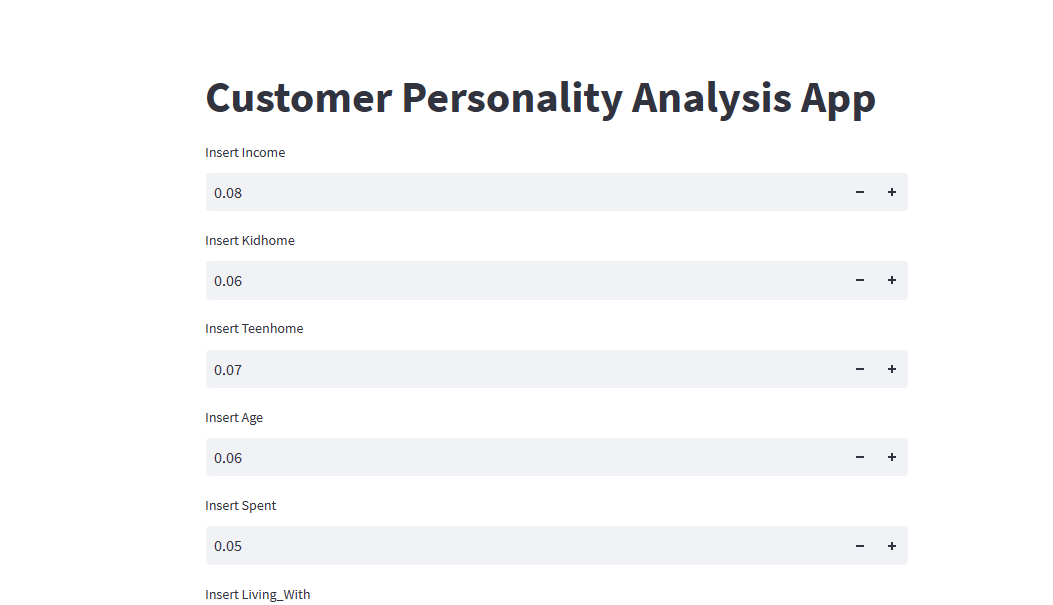

# Thank You...